# 

# Common Tweet Emojis

<div class="alert alert-success"> 
In order to assess how many emojis we want to gather data for, we need to run an analysis of the most used ones. (Indeed, asking a few thousands users to describe an emoji like 🥍 might be less useful than😄) 
</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import emoji
import seaborn as sns
import pandas as pd
from IPython.core.debugger import set_trace
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import warnings
from src.data.common_emojis import load_or_compute_tweetpaths,compute_twitter_data,compute_twitter_data, update_emoji_count, load_or_compute_emdf, print_tot_emoji_ratio, display_cover_app_ratio, display_log_hist 
from src.utils import print_mem_usage
from src.constants import skin_tones
from copy import copy
from pdb import set_trace
from pathlib import Path
import bz2
from src.constants import TWEET_PATHS_PATH,TWEET_PATH
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'
sns.set()

## Tweet dataframe loading

<div class="alert alert-success"> 
The first step consists in extracting a random subset from tweeter data of consequent size ( > 500 MB). Once computed, this file is stored for subsequent use and reloaded.
</div>

In [8]:
tweet_df = compute_twitter_data(TWEET_PATH)

Loading precomputed paths structure


  0%|          | 0/30001 [00:00<?, ?it/s]

Analyzing 30000 files
EOF error ==> continue


  0%|          | 6/30001 [00:05<7:59:47,  1.04it/s]


KeyboardInterrupt: 

In [72]:
reader = pd.read_csv("../data/raw/tweets/big_tweet.csv", sep=',', header=None, chunksize=10000)

## Emojis Counts

<div class="alert alert-success"> 
The next step consists in extracting counts from the twitter data and plot a few statistics.
</div>

In [37]:
em_df = load_or_compute_em_df(path="../data/raw/tweets/em_counts.csv")

In [38]:
print_tot_emoji_ratio(em_df)

Grasped 45.27% of the total emojis


In [39]:
for i,em in enumerate(em_df.head(100).index):
    print(em,end="")
    if (i+1) % 10 == 0:
        print("\n")

😂😭❤🔥😍🤣💜✨💕🥺

💙🇺🇸💖💀😩🥰😊🎉😘

👀👏💗💛🚨🙏🤔💚♥🏆

💦💯🙄🖤😔💞‼😎😁👉

👇💥💓😳😈🇬😉😅👍🇳

✅🤗🌸⭐💋🤪😢😌🤩🗣

☺💔💘🌹🙌😱🇷💪👌😏

🤤✔😤🔴👑😋🇦🤧🧡🎶

🎂🌟💫🇵🥴⚪🙃☀😆😫

🤡🇮⚡➡🔵🥳😡🇪🇧❗



In [7]:
print(em_df.head(10))

😂    17585
😭     9525
❤     6545
🔥     4613
😍     4317
🤣     4075
🏻     2661
💜     2388
✨     2312
💕     2311
Name: counts, dtype: int64


Q25:3.0
Q50:48.0
Q75:11.0
Q99:1239.08


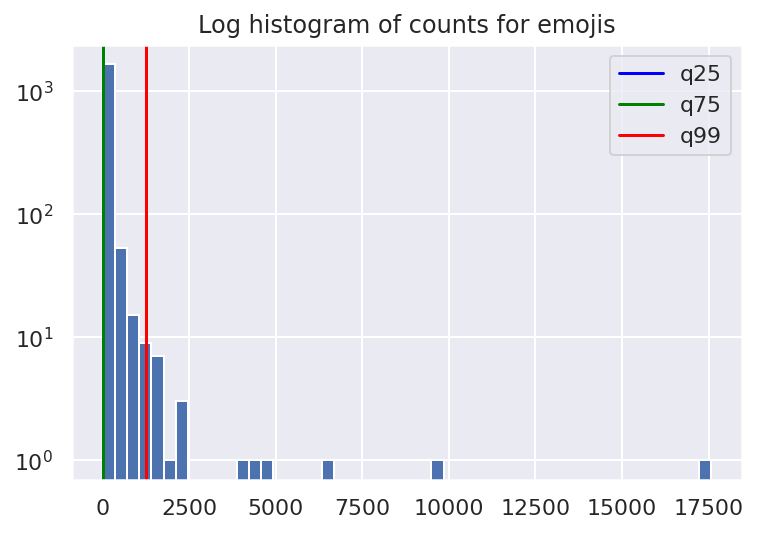

In [41]:
fig, ax = plt.subplots(1)
display_log_hist(em_df,ax=ax)

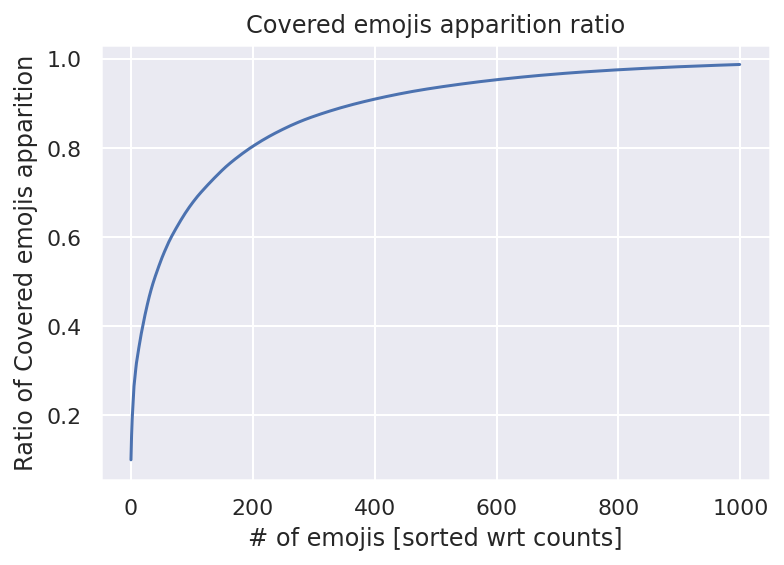

In [42]:
fig,ax = plt.subplots(1)
display_cover_app_ratio(em_df,ax)